In [101]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [102]:
#load movie data
movies_one_hot = pd.read_csv("movies_one_hot.csv")

# Print the first few rows of the DataFrame
print(movies_one_hot.head())

   runtime  rating      votes  gross_earn  director_avg_earn  Action  \
0    142.0     9.3  2626905.0       28.34          54.635000       0   
1    152.0     9.0  2598173.0      534.86         201.832222       1   
2    148.0     8.8  2304062.0      292.58         201.832222       1   
3    139.0     8.8  2071088.0       37.03          86.519000       0   
4    154.0     8.9  2011013.0      107.93          78.026250       0   

   Adventure  Animation  Biography  Comedy  ...  Horror  Music  Musical  \
0          0          0          0       0  ...       0      0        0   
1          0          0          0       0  ...       0      0        0   
2          1          0          0       0  ...       0      0        0   
3          0          0          0       0  ...       0      0        0   
4          0          0          0       0  ...       0      0        0   

   Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0        0       0      0         0    0      

In [103]:
movies_one_hot.columns

Index(['runtime', 'rating', 'votes', 'gross_earn', 'director_avg_earn',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [104]:
# Drop unwanted columns
movies_one_hot = movies_one_hot.drop(['gross_earn'], axis=1)

In [105]:
movies_one_hot.describe

<bound method NDFrame.describe of       runtime  rating      votes  director_avg_earn  Action  Adventure  \
0       142.0     9.3  2626905.0          54.635000       0          0   
1       152.0     9.0  2598173.0         201.832222       1          0   
2       148.0     8.8  2304062.0         201.832222       1          1   
3       139.0     8.8  2071088.0          86.519000       0          0   
4       154.0     8.9  2011013.0          78.026250       0          0   
...       ...     ...        ...                ...     ...        ...   
4995    102.0     7.3    25112.0          10.563333       0          0   
4996     94.0     5.9    28515.0          47.625520       0          0   
4997    106.0     8.1    23957.0          47.625520       0          0   
4998     92.0     7.0    21536.0           5.750000       0          0   
4999    120.0     7.6    25097.0          27.207778       0          0   

      Animation  Biography  Comedy  Crime  ...  Horror  Music  Musical  \
0  

In [106]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
movies_scaled = scaler.fit_transform(movies_one_hot)


In [107]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Try 3 clusters as an initial guess
movies_one_hot['cluster'] = kmeans.fit_predict(movies_scaled)

# Check the number of movies per cluster
print(movies_one_hot['cluster'].value_counts())


cluster
1    1898
2    1791
0    1311
Name: count, dtype: int64


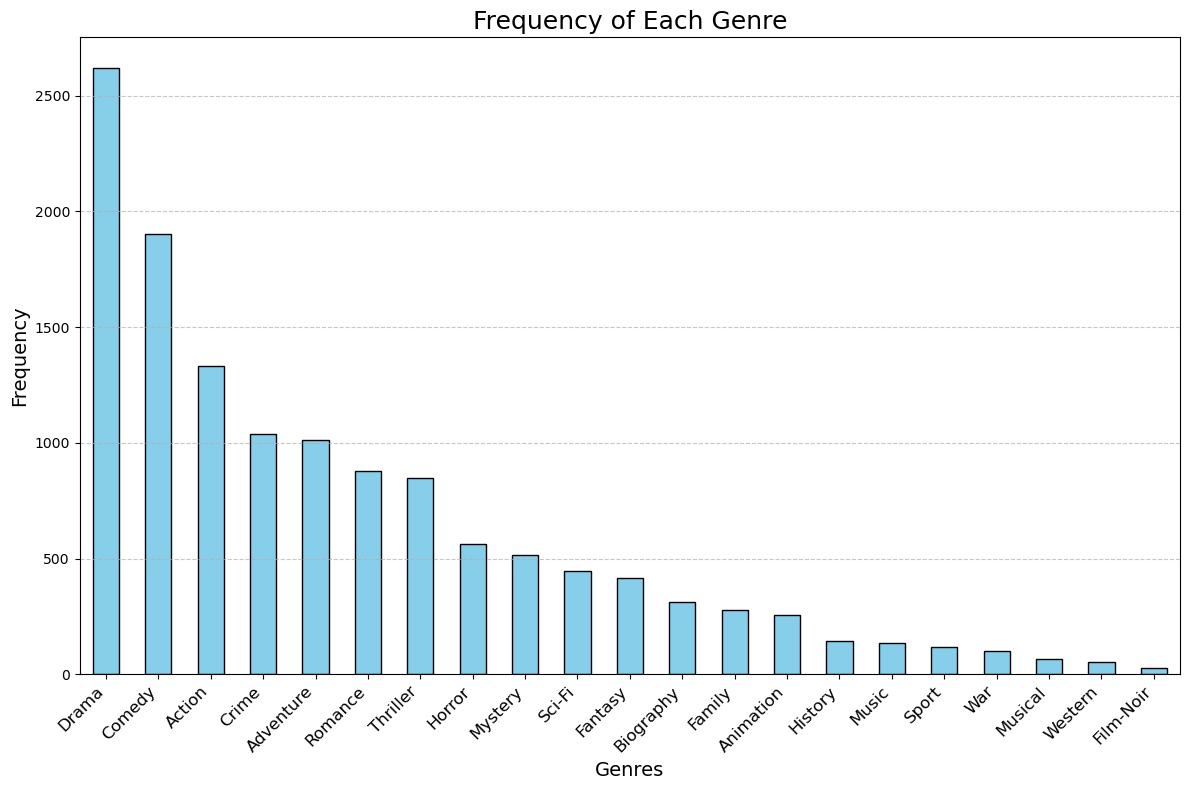

In [108]:
import pandas as pd
import matplotlib.pyplot as plt


# List of genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 
                 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 
                 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
                 'Thriller', 'War', 'Western']

# Sum each genre column to calculate frequency
genre_frequencies = movies_one_hot[genre_columns].sum()

# Create a bar plot
plt.figure(figsize=(12, 8))
genre_frequencies.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Frequency of Each Genre', fontsize=18)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


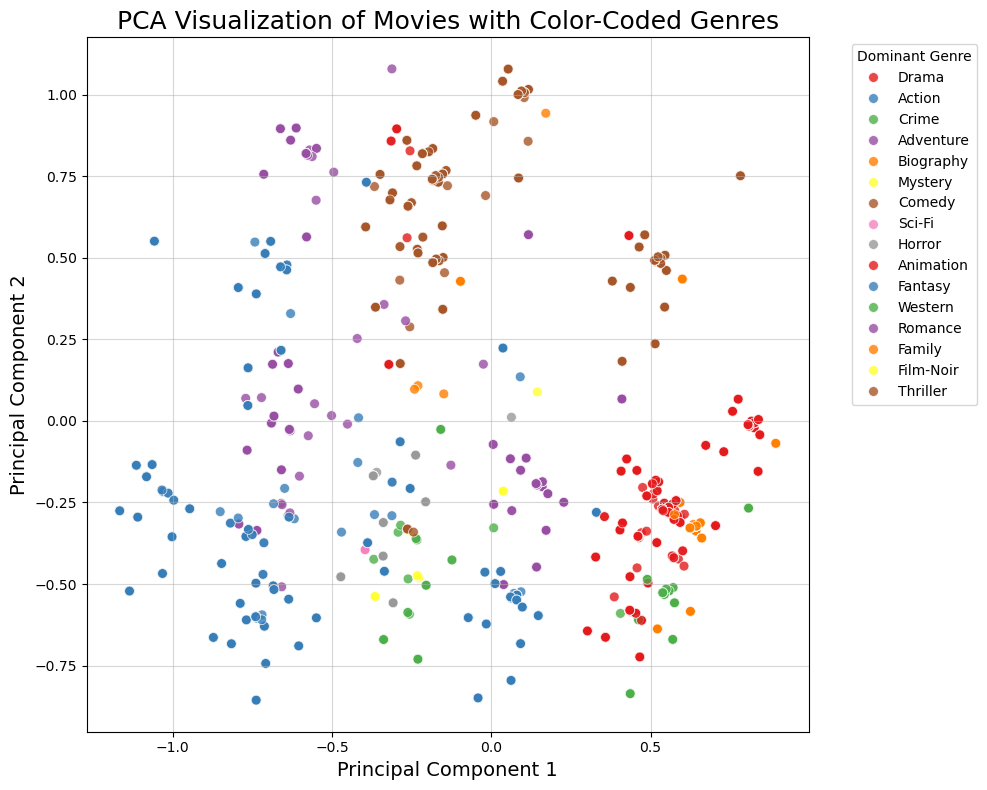

In [127]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'movies_one_hot' is your dataset and it's already loaded with genre columns

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(movies_one_hot[genre_columns])

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Here we assume you're color-coding based on the most frequent genre for each movie
# If movies are categorized by multiple genres, we pick the most prominent one (e.g., highest frequency genre for each movie)
# Assuming 'movies_one_hot' contains the genre columns, we'll take the genre with the highest value for each movie

# Get the genre with the highest value for each movie
pca_df['Dominant_Genre'] = movies_one_hot[genre_columns].idxmax(axis=1)

# Plot PCA results with color coding based on the dominant genre
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Dominant_Genre', data=pca_df, palette='Set1', s=50, alpha=0.8)
plt.title('PCA Visualization of Movies with Color-Coded Genres', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(title='Dominant Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [132]:
movies_one_hot.columns

Index(['runtime', 'rating', 'votes', 'gross_earn', 'director_avg_earn',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'is_good'],
      dtype='object')

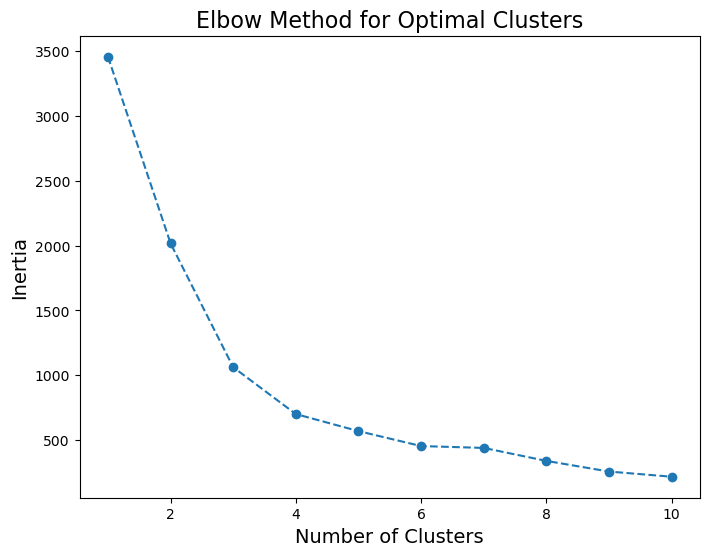

In [129]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Test for k = 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)

# Plot inertia vs number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()


Overall Interpretation:

The elbow plot shows the relationship between the number of clusters (k) and the within-cluster sum of squares (inertia). The goal is to find the "elbow point" where the decrease in inertia starts to level off. This point suggests the optimal number of clusters for the data.
Specific Observations:

Steep Drop: Initially, as the number of clusters increases, the inertia decreases rapidly. This indicates that each additional cluster is significantly reducing the variability within the clusters.
Elbow Point: Around k=4, the curve starts to flatten out. This is a potential "elbow point" where adding more clusters doesn't significantly reduce the inertia.
Gradual Decrease: Beyond the elbow point, the decrease in inertia becomes more gradual, suggesting that adding more clusters might not be adding much value.
Interpretation of the Elbow Point (k=4):

The elbow point at k=4 suggests that using 4 clusters might be a good choice for this dataset. This means that the data can be divided into 4 distinct groups, each with relatively low internal variability.

Important Considerations:

Domain Knowledge: The optimal number of clusters can also depend on domain knowledge and the specific goals of the analysis. Sometimes, a different number of clusters might be more meaningful based on the context.
Other Methods: While the elbow method is a common approach, other methods like the silhouette method can also be used to determine the optimal number of clusters.
Additional Insights:

Cluster Analysis: Once we've determined the optimal number of clusters, we can considor using clustering algorithms like K-means or hierarchical clustering to group the data points into these clusters.
Cluster Interpretation: We can analyze the characteristics of each cluster to understand the underlying patterns and relationships within the data.

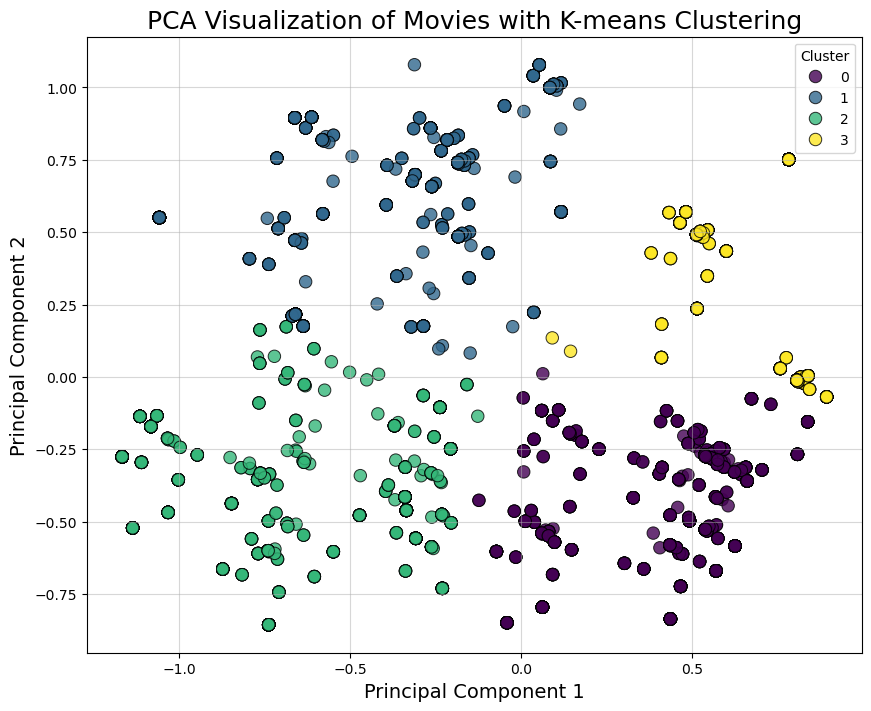

In [130]:
from sklearn.cluster import KMeans
import seaborn as sns

# Apply K-means clustering to the PCA data (PC1 and PC2)
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose the number of clusters
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Plot the PCA results with the cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=80, alpha=0.8, edgecolor='black')

# Customize the plot
plt.title('PCA Visualization of Movies with K-means Clustering', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.grid(alpha=0.5)
plt.show()


Cluster Separation: The four clusters appear to be relatively well-separated, suggesting that the clustering algorithm has effectively identified distinct groups of movies.
Cluster Density: Some clusters are denser than others, indicating that they contain more movies with similar characteristics.
Cluster Overlap: There is some overlap between the clusters, especially between clusters 0 and 1. This suggests that there might be some ambiguity in the classification of certain movies.
Interpreting the Clusters:

Without more information about the specific features used in the PCA analysis and the genre distribution within each cluster, we can make some general observations:

Cluster 0 (Purple):

Possible Genres: Drama, Thriller, Mystery
Interpretation: This cluster might contain movies with more serious themes, focusing on character development, suspense, and intrigue.
Cluster 1 (Green):

Possible Genres: Comedy, Romance, Family
Interpretation: This cluster might represent movies that are light-hearted, entertaining, and suitable for family audiences.
Cluster 2 (Blue):

Possible Genres: Action, Adventure, Sci-Fi, Fantasy
Interpretation: This cluster might contain movies with high-octane action, thrilling adventures, and fantastical elements.
Cluster 3 (Yellow):

Possible Genres: A mix of genres, including Drama, Comedy, and Action.
Interpretation: This cluster might contain movies that blend different genres, offering a diverse range of themes and styles.
Further Analysis:

To gain deeper insights, you could:

Analyze Individual Movies: Examine specific movies within each cluster to identify common themes, directors, or actors.
Explore Time Trends: Analyze how the distribution of genres within each cluster has changed over time.
Consider External Factors: Factor in external factors like cultural trends, technological advancements, or economic conditions that might have influenced the popularity of certain genres.
Feature Importance Analysis: Use techniques like SHAP values or permutation importance to identify the most influential features in determining cluster membership.
By combining the PCA visualization with additional analysis, you can gain a comprehensive understanding of the underlying patterns and relationships within your movie dataset.

In [111]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the data
tsne_results = tsne.fit_transform(movies_one_hot)


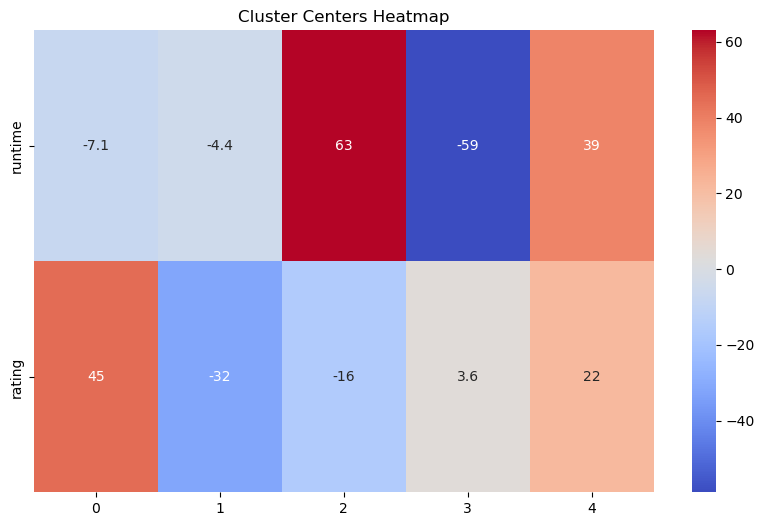

In [114]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=movies_one_hot.columns[:kmeans.cluster_centers_.shape[1]])

# Plot a heatmap of cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers.T, annot=True, cmap="coolwarm")
plt.title("Cluster Centers Heatmap")
plt.show()

Color Coding:

Red indicates higher values or stronger contributions of a feature to a particular cluster.
Blue indicates lower values or weaker contributions.
Neutral colors (white/gray) indicate moderate values or neutral contributions.
Key Insights from Features and Clusters:

Cluster 0:
High positive contributions for features like Crime (0.58), Mystery (0.52), and Horror (0.64).
Negative contributions for Romance (-0.44) and Comedy (-0.43).
This cluster might represent movies with intense or thrilling themes.
Cluster 1:
Strong positive contribution from Adventure (1.7) and Animation (0.86).
Negative contributions from Drama (-0.73) and Crime (-0.41).
Likely represents lighthearted or family-oriented movies.
Cluster 2:
High positive contributions from Action (0.72) and director_avg_earn (0.89).
Moderate values for features like votes (0.56).
Negative contributions for Adventure (-0.4) and Horror (-0.34).
Likely reflects action-oriented movies with strong box office performance or big-name directors.
General Observations:

The clusters appear to segment movies based on themes (e.g., genre-specific like Horror/Crime, Adventure/Animation, or Action).
Features like rating, runtime, and votes also vary across clusters, suggesting these clusters represent different types of movie audiences or performance metrics.
Cluster 0 Dominance in Crime and Mystery:

Cluster 0 stands out with the strongest contribution from Horror and Crime, suggesting this group contains darker or more suspenseful movies.
Cluster 1 Centered Around Adventure and Animation:

Cluster 1 is characterized by high contributions from Adventure and Animation, suggesting family-friendly or exciting narratives.
Cluster 2 Driven by Action and Financial Success:

Cluster 2’s positive values for Action and director_avg_earn suggest this cluster is dominated by movies with strong action elements and commercial success.

In [116]:
#pip install xgboost

In [117]:
#!pip install imbalanced-learn

In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [119]:
#reload data to get gross_earn column back
#load movie data
movies_one_hot = pd.read_csv("movies_one_hot.csv")

# Print the first few rows of the DataFrame
print(movies_one_hot.head())

   runtime  rating      votes  gross_earn  director_avg_earn  Action  \
0    142.0     9.3  2626905.0       28.34          54.635000       0   
1    152.0     9.0  2598173.0      534.86         201.832222       1   
2    148.0     8.8  2304062.0      292.58         201.832222       1   
3    139.0     8.8  2071088.0       37.03          86.519000       0   
4    154.0     8.9  2011013.0      107.93          78.026250       0   

   Adventure  Animation  Biography  Comedy  ...  Horror  Music  Musical  \
0          0          0          0       0  ...       0      0        0   
1          0          0          0       0  ...       0      0        0   
2          1          0          0       0  ...       0      0        0   
3          0          0          0       0  ...       0      0        0   
4          0          0          0       0  ...       0      0        0   

   Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0        0       0      0         0    0      

In [120]:
print(movies_one_hot.columns)


Index(['runtime', 'rating', 'votes', 'gross_earn', 'director_avg_earn',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [121]:
#pip install --upgrade xgboost


In [122]:
#pip show xgboost


In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

movies_one_hot['is_good'] = (movies_one_hot['gross_earn'] >= 50).astype(int)
y = movies_one_hot['is_good']


# Use numeric features from movies_one_hot,  excluding 'gross_earn' to avoid data leakage
X = movies_one_hot.drop(columns=['gross_earn', 'is_good'])  # Dropping 'gross_earn' and 'is_good'
y = movies_one_hot['is_good']

# Step 1: Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data (unscaled)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 3: Scale numeric features (fit on training set only)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)

# Step 4: Define parameter grid for hyperparameter tuning
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Initialize GridSearchCV with XGBoost and the parameter grid
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', early_stopping_rounds=10),
    param_grid=params,
    scoring='roc_auc',
    cv=cv
)

# Step 6: Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_res_scaled, y_train_res, eval_set=[(X_val_scaled, y_val)], verbose=False)

# Step 7: Get the best model
best_model = grid_search.best_estimator_
print(best_model)

# Step 8: Evaluate the model
y_pred = best_model.predict(X_val_scaled)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Step 9: Calculate and print ROC-AUC score
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]
roc_score = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")

# Step 10: Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       687
           1       0.74      0.85      0.79       313

    accuracy                           0.86      1000
   macr

In [133]:
X

,runtime,rating,votes,director_avg_earn,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,142.0,9.3,2626905.0,54.635000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152.0,9.0,2598173.0,201.832222,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,148.0,8.8,2304062.0,201.832222,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,139.0,8.8,2071088.0,86.519000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,154.0,8.9,2011013.0,78.026250,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,102.0,7.3,25112.0,10.563333,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4996,94.0,5.9,28515.0,47.625520,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4997,106.0,8.1,23957.0,47.625520,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4998,92.0,7.0,21536.0,5.750000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


ROC-AUC Score (0.93):
A score of 0.93 indicates that the model is excellent at distinguishing between the two classes (good vs. not good). The ROC-AUC score being close to 1.0 is a sign of high predictive power.

Classification Report:

Precision:
For class 0 (not good), precision is 93%, meaning the model correctly predicts most movies as "not good" when it says so.
For class 1 (good), precision is 74%, which is still quite good, though slightly lower, meaning some "good" predictions may be incorrect.
Recall:
Class 0 has a recall of 86%, meaning the model captures most "not good" movies correctly.
Class 1 has a recall of 85%, which is impressive because it successfully identifies most "good" movies.
F1-Score:
The F1-scores for both classes (0.90 and 0.79) show a good balance between precision and recall, with stronger performance for class 0.
Confusion Matrix:

The model correctly classified:
594 out of 687 "not good" movies (true negatives).
267 out of 313 "good" movies (true positives).
Misclassifications:
93 "not good" movies were incorrectly predicted as "good" (false positives).
46 "good" movies were incorrectly predicted as "not good" (false negatives).
Insights:
Strengths: The model is robust and performs well across both classes, especially given the imbalanced nature of the dataset. SMOTE has likely contributed to the strong performance for the minority class (class 1).
Areas for Potential Improvement:
The precision for class 1 could be improved by tuning the decision threshold or tweaking hyperparameters further.
Reducing false positives (93) might also make the model more precise.

In [124]:
print(X_train.describe())
print(X_val.describe())

           runtime       rating         votes  director_avg_earn       Action  \
count  4000.000000  4000.000000  4.000000e+03        4000.000000  4000.000000   
mean    110.259000     6.702500  1.362038e+05          47.235292     0.263500   
std      21.694702     0.970139  2.010707e+05          48.264777     0.440586   
min      45.000000     1.500000  1.848700e+04           0.000000     0.000000   
25%      96.000000     6.100000  3.749550e+04          14.201250     0.000000   
50%     106.000000     6.800000  6.842000e+04          36.770000     0.000000   
75%     120.000000     7.400000  1.439732e+05          63.601429     1.000000   
max     366.000000     9.300000  2.626905e+06         415.000000     1.000000   

         Adventure    Animation    Biography      Comedy        Crime  ...  \
count  4000.000000  4000.000000  4000.000000  4000.00000  4000.000000  ...   
mean      0.200750     0.049500     0.064250     0.38050     0.205000  ...   
std       0.400611     0.216937     